In [18]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
import matplotlib.pyplot as plt

In [2]:
headers = {"X-API-KEY": "SCDTN8K-C0DM1PK-HGHMDZE-JKFPG2V"}


def get_movies_for_last_year():
    params = {
        'selectFields': 'name movieLength genres rating type votes year budget fees distributors premiere',
        'type': 'movie',
        'sortField': 'votes.kp',
        'sortType': '-1',
        'limit': 4000
    }
    response = requests.get(
        'https://api.kinopoisk.dev/v1.3/movie',
        headers=headers,
        params=params
    )

    return response.text


movies = get_movies_for_last_year()
movies = movies.replace('\xa0', ' ')

with open('data.txt', 'w', encoding='utf-8') as file:
    file.write(str(json.loads(movies)))
    file.flush()

formatted = json.loads(movies)

In [3]:
formatted

{'docs': [{'fees': {'world': {'value': 426588510, 'currency': '$'},
    'russia': {'value': 1725813, 'currency': '$'},
    'usa': {'value': 10198820, 'currency': '$'}},
   'rating': {'kp': 8.805,
    'imdb': 8.5,
    'filmCritics': 6.8,
    'russianFilmCritics': 100,
    'await': None},
   'votes': {'kp': 1571449,
    'imdb': 877853,
    'filmCritics': 130,
    'russianFilmCritics': 12,
    'await': 15},
   'movieLength': 112,
   'type': 'movie',
   'name': '1+1',
   'distributors': {'distributor': 'Каскад фильм',
    'distributorRelease': 'Новый Диск'},
   'premiere': {'world': '2011-09-23T00:00:00.000Z',
    'russia': '2012-04-26T00:00:00.000Z'},
   'year': 2011,
   'budget': {'value': 9500000, 'currency': '€'},
   'genres': [{'name': 'драма'}, {'name': 'комедия'}, {'name': 'биография'}]},
  {'fees': {'world': {'value': 115171795, 'currency': '$'},
    'russia': {'value': 18003343, 'currency': '$'},
    'usa': {'value': 36471795, 'currency': '$'}},
   'rating': {'kp': 8.544,
    'imd

In [4]:
type(formatted)

dict

In [5]:
keys_list = list(formatted.keys())
keys_list

['docs', 'total', 'limit', 'page', 'pages']

In [6]:
type(formatted['docs'][0])

dict

In [7]:
len(formatted['docs'])

4000

In [8]:
df = pd.DataFrame.from_dict(formatted['docs'], orient='columns')
df_final = pd.json_normalize(formatted['docs'])

In [9]:
df_final

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
0,112.0,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",426588510.0,$,1725813.0,$,10198820.0,...,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN,NaN,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[{'name': 'криминал'}, {'name': 'комедия'}, {'...",115171795.0,$,18003343.0,$,36471795.0,...,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN,NaN,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",392000694.0,$,13796916.0,$,116900694.0,...,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN,NaN,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[{'name': 'боевик'}, {'name': 'триллер'}]",103966489.0,$,13318455.0,$,27466489.0,...,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN,NaN,NaN,NaN
4,100.0,movie,Брат,1997,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",1362281.0,$,NaN,NaN,NaN,...,Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,movie,Пережить Рождество,2004,"[{'name': 'мелодрама'}, {'name': 'комедия'}]",14793624.0,$,1070000.0,$,11663156.0,...,ВС трейд,2004-10-14T00:00:00.000Z,2004-12-16T00:00:00.000Z,45000000.0,$,NaN,NaN,NaN,NaN,NaN
3996,99.0,movie,Душевная кухня,2009,"[{'name': 'драма'}, {'name': 'комедия'}]",17872796.0,$,281522.0,$,276901.0,...,Вольга,2009-09-10T00:00:00.000Z,2010-01-21T00:00:00.000Z,4000000.0,€,NaN,NaN,NaN,NaN,NaN
3997,108.0,movie,Самоволка,1990,"[{'name': 'боевик'}, {'name': 'драма'}]",24271196.0,$,NaN,NaN,24078196.0,...,Твистер,1990-08-01T00:00:00.000Z,1993-11-29T00:00:00.000Z,6000000.0,$,NaN,NaN,NaN,NaN,NaN
3998,112.0,movie,Классный мюзикл. Выпускной,2008,"[{'name': 'мюзикл'}, {'name': 'драма'}, {'name...",252909177.0,$,733900.0,$,90559416.0,...,Уолт Дисней Компани СНГ,2008-09-28T00:00:00.000Z,2008-11-13T00:00:00.000Z,11000000.0,$,NaN,NaN,NaN,NaN,NaN


# Обработка данных

In [10]:
import re
df_final['genres'] = df_final['genres'].apply(lambda x: re.findall(r"'name': '([^']*)'", str(x)))

In [11]:
df_final

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN,NaN,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN,NaN,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN,NaN,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN,NaN,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,movie,Пережить Рождество,2004,"[мелодрама, комедия]",14793624.0,$,1070000.0,$,11663156.0,...,ВС трейд,2004-10-14T00:00:00.000Z,2004-12-16T00:00:00.000Z,45000000.0,$,NaN,NaN,NaN,NaN,NaN
3996,99.0,movie,Душевная кухня,2009,"[драма, комедия]",17872796.0,$,281522.0,$,276901.0,...,Вольга,2009-09-10T00:00:00.000Z,2010-01-21T00:00:00.000Z,4000000.0,€,NaN,NaN,NaN,NaN,NaN
3997,108.0,movie,Самоволка,1990,"[боевик, драма]",24271196.0,$,NaN,NaN,24078196.0,...,Твистер,1990-08-01T00:00:00.000Z,1993-11-29T00:00:00.000Z,6000000.0,$,NaN,NaN,NaN,NaN,NaN
3998,112.0,movie,Классный мюзикл. Выпускной,2008,"[мюзикл, драма, мелодрама, комедия, семейный, ...",252909177.0,$,733900.0,$,90559416.0,...,Уолт Дисней Компани СНГ,2008-09-28T00:00:00.000Z,2008-11-13T00:00:00.000Z,11000000.0,$,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df_final.dtypes)

movieLength                        float64
type                                object
name                                object
year                                 int64
genres                              object
fees.world.value                   float64
fees.world.currency                 object
fees.russia.value                  float64
fees.russia.currency                object
fees.usa.value                     float64
fees.usa.currency                   object
rating.kp                          float64
rating.imdb                        float64
rating.filmCritics                 float64
rating.russianFilmCritics          float64
rating.await                       float64
votes.kp                             int64
votes.imdb                           int64
votes.filmCritics                    int64
votes.russianFilmCritics             int64
votes.await                          int64
distributors.distributor            object
distributors.distributorRelease     object
premiere.wo

In [13]:
df_final['premiere.world'] = pd.to_datetime(df_final['premiere.world'])
df_final['premiere.russia'] = pd.to_datetime(df_final['premiere.russia'])

In [14]:
df_final.isnull().sum()

movieLength                           1
type                                  0
name                                  0
year                                  0
genres                                0
fees.world.value                    417
fees.world.currency                 417
fees.russia.value                  1270
fees.russia.currency               1270
fees.usa.value                     1162
fees.usa.currency                  1162
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
rating.await                       3933
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1097
distributors.distributorRelease    1495
premiere.world                      154
premiere.russia                     889


In [15]:
df_final = df_final.drop(['premiere.digital', 'premiere.dvd', 'premiere.country', 'premiere.cinema', 'type'], axis=1)
df_final

,movieLength,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,fees.usa.currency,...,votes.filmCritics,votes.russianFilmCritics,votes.await,distributors.distributor,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.bluray
0,112.0,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,$,...,130,12,15,Каскад фильм,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,9500000.0,€,NaN
1,113.0,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,$,...,277,22,13642,Вольга,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$,NaN
2,180.0,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,$,...,289,31,43024,West,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$,NaN
3,119.0,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,$,...,256,37,23492,Вольга,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$,NaN
4,100.0,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,NaN,...,5,2,0,"Кармен-Премьер, СТВ",Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,Пережить Рождество,2004,"[мелодрама, комедия]",14793624.0,$,1070000.0,$,11663156.0,$,...,116,1,0,UIP,ВС трейд,2004-10-14 00:00:00+00:00,2004-12-16 00:00:00+00:00,45000000.0,$,NaN
3996,99.0,Душевная кухня,2009,"[драма, комедия]",17872796.0,$,281522.0,$,276901.0,$,...,60,0,287,Вольга,Вольга,2009-09-10 00:00:00+00:00,2010-01-21 00:00:00+00:00,4000000.0,€,NaN
3997,108.0,Самоволка,1990,"[боевик, драма]",24271196.0,$,NaN,NaN,24078196.0,$,...,0,0,0,Екатеринбург Арт,Твистер,1990-08-01 00:00:00+00:00,1993-11-29 00:00:00+00:00,6000000.0,$,NaN
3998,112.0,Классный мюзикл. Выпускной,2008,"[мюзикл, драма, мелодрама, комедия, семейный, ...",252909177.0,$,733900.0,$,90559416.0,$,...,132,2,0,BVSPR,Уолт Дисней Компани СНГ,2008-09-28 00:00:00+00:00,2008-11-13 00:00:00+00:00,11000000.0,$,NaN


In [16]:
df_final.isnull().sum()

movieLength                           1
name                                  0
year                                  0
genres                                0
fees.world.value                    417
fees.world.currency                 417
fees.russia.value                  1270
fees.russia.currency               1270
fees.usa.value                     1162
fees.usa.currency                  1162
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
rating.await                       3933
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1097
distributors.distributorRelease    1495
premiere.world                      154
premiere.russia                     889
budget.value                       1019


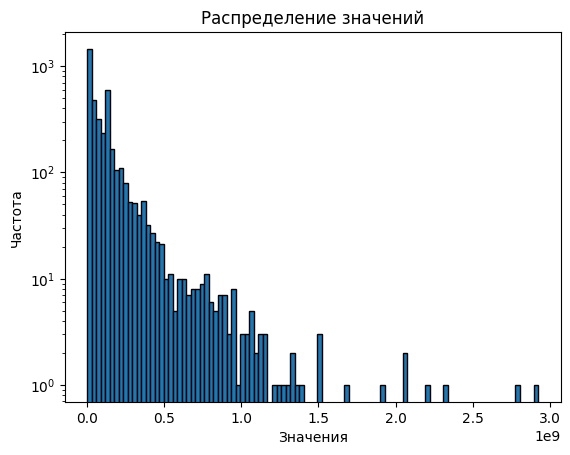

In [19]:

df_final['fees.world.value'] = df_final['fees.world.value'].fillna(value=df_final['fees.world.value'].mean())
plt.hist(df_final['fees.world.value'], bins=100, edgecolor='black', log=True)


plt.title('Распределение значений')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()